# Amazon Stock Analysis #


## Dataset ##
* AMZN_daily_data.csv
* MasterCard_daily_data.csv
* Visa_daily_data.csv
* FDX_daily_data.csv
* UPS_daily_data.csv


# Data Preprocessing #
Before analyse the stock of Amazon, we need to make sure the data is with high quality

Through the preprocessing, we will check for missing/negative values and duplicate data and outliers.


### 1.To read the data ###

<font color="red">Code:</font>

In [ ]:
import pandas as pd
data=pd.read_csv('AMZN_daily_data.csv')
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 6888
Number of attributes = 7


,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


### 2.Check for duplicate ###

**Methodology**

* Duplicate Detection: The duplicated() method is used to identify rows that are exact duplicates of other rows in the dataset.

* Duplicate Removal:Duplicate rows, if any, are removed using the drop_duplicates() method, ensuring the dataset only contains unique rows.

<font color="red">Code:</font>

In [ ]:
import pandas as pd

# Load data
data = pd.read_csv("AMZN_daily_data.csv")

# check duplicates
duplicate_rows = data[data.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# print dulplicate rows（if any）
if duplicate_rows.shape[0] > 0:
    print("Duplicate rows:")
    print(duplicate_rows)

# delete duplicates rows（if any）
data_cleaned = data.drop_duplicates()

# check the shape of data after modified
print(f"Data shape after removing duplicates: {data_cleaned.shape}")


Number of duplicate rows: 0
Data shape after removing duplicates: (6888, 7)


**Result**

* Duplicate Rows Check:The script identifies the number of duplicate rows in the dataset.
* There is no duplicates were present, the dataset remains unchanged.
  
**Conclusion**:

* From the above, we can see there is no duplicate rows in the data set

### 3.Check for missing/negative values  ###

The goal is to ensure data quality by identifying and handling any missing values before proceeding with further analysis.

**Methodology**

* Identify Missing Values:uses the isna() function to detect missing values in the dataset.
* For each column, the total count of missing values is calculated using the sum() method.


<font color="red">Code:</font>

In [ ]:
# Check the number of missing values
missing_values = data.isna().sum()

# Print the number of missing values for each column
print("Missing values summary:")
print(missing_values)

# If more detailed rows with missing values are needed:
if missing_values.sum() > 0:
    print("\nRows containing missing values:")
    print(data[data.isna().any(axis=1)])
else:
    print("\nThere are no missing values in the dataset.")


Missing values summary:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There are no missing values in the dataset.


**Results**

* Summary of Missing Values:For each column, the number of missing values is displayed

**Conclusion**:

* From the above, we can see there is no missing value in the data set.

### 4.Check for outliers ###
**Methodology:**

* In stock data, **outliers** may include extreme prices or volumes, and they can be identified using statistical methods or visualization tools. By calculating statistical features of each column (such as mean and standard deviation), outliers can be detected.

* For this case, **values that deviate from the mean by more than three times the standard deviation are considered outliers** Box plots also be used to visually detect outliers in price and volume. If extreme points appear on the plot, they may represent noise.

<font color="red">Code:</font>

Outliers in Close column:
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []
Outliers in Volume column:
            Date      Open      High       Low     Close  Adj Close  \
0     1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917   
239   1998-04-28  0.386979  0.414583  0.371094  0.398438   0.398438   
240   1998-04-29  0.405208  0.410938  0.390104  0.397917   0.397917   
270   1998-06-11  0.460417  0.521875  0.458333  0.520833   0.520833   
272   1998-06-15  0.495833  0.570833  0.492708  0.547917   0.547917   
...          ...       ...       ...       ...       ...        ...   
3131  2009-10-23  5.552500  5.982500  5.531000  5.924500   5.924500   
3132  2009-10-26  5.960500  6.284000  5.924500  6.232000   6.232000   
3197  2010-01-29  6.488500  6.592500  6.207000  6.270500   6.270500   
3198  2010-02-01  6.159000  6.243000  5.691000  5.943500   5.943500   
3318  2010-07-23  5.296500  5.964000  5.290000  5.943500   5.943500   

         

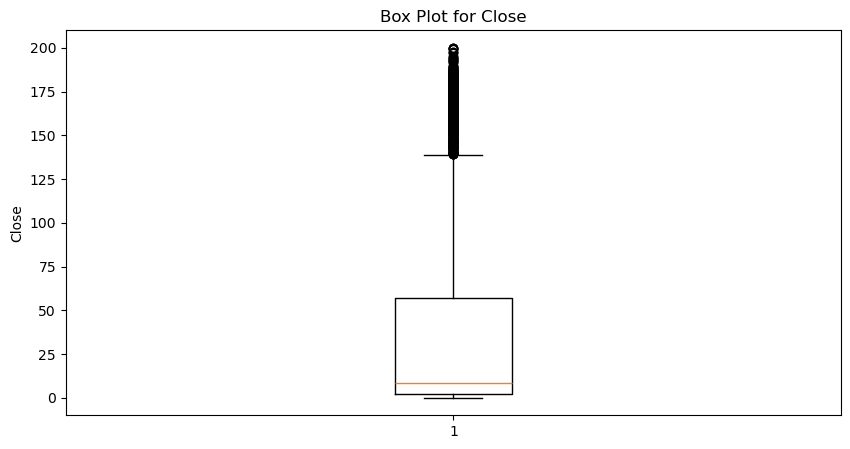

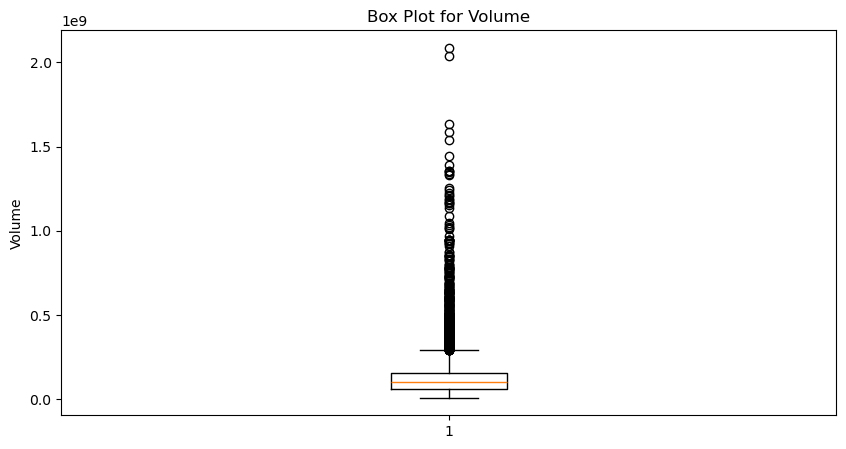

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("AMZN_daily_data.csv")

# Identify columns "Close" and "Volume"
columns_to_check = ["Close", "Volume"]

# Detect outliers by calculating mean and standard deviation
outliers = {}
for column in columns_to_check:
    mean = data[column].mean()
    std_dev = data[column].std()
    # Find outliers that are more than 3 standard deviations from the mean
    outliers[column] = data[(data[column] > mean + 3 * std_dev) | (data[column] < mean - 3 * std_dev)]

# Print outliers
for column, outlier_data in outliers.items():
    print(f"Outliers in {column} column:")
    print(outlier_data)

# Plot box plot to visualize outliers
for column in columns_to_check:
    plt.figure(figsize=(10, 5))
    plt.boxplot(data[column].dropna())  # Drop NaN values for plotting
    plt.title(f"Box Plot for {column}")
    plt.ylabel(column)
    plt.show()


**Result**

* 1.Close Column Outliers:

No outliers were detected in the "Close" column

However, from the box plot of the "Close" column, there are some "extreme values"（greather than 1.5IQ but less than 3 standard deviations from the mean ) at the top (black dots above the box), which may indicate potential extreme fluctuations and are worth further investigation.

* 2.Volume Column Outliers:

145 data points were identified as outliers.

The box plot of the "Volume" column shows multiple extreme values, with some data points lying outside significantly higher than most other data points at the top of the plot

**Conclusion & Discussion**

* Outliers are not seen as noises.

* In stock trading, especially for large companies like Amazon, outliers in trading volume often reflect investor reactions to market or company events. It is reasonable to assume that **these outliers are not merely noise**, as they likely convey the market's view on company dynamics or responses to macroeconomic events.


# Amazon Stock Analysis Theme #


## Part 1:Overall performance of Amazon ##

### 1.Close and Volume Time Series Plots to Observe Trends Over Time ###

**Methodology:**

* Column Selection for Outlier Detection:Focus is placed on the "Close" and "Volume" columns, which are critical metrics for stock analysis.
* Visualization:This code will generate two separate plots: one for the Close column time series and another for the Volume column time series.

<font color="red">Code:</font>

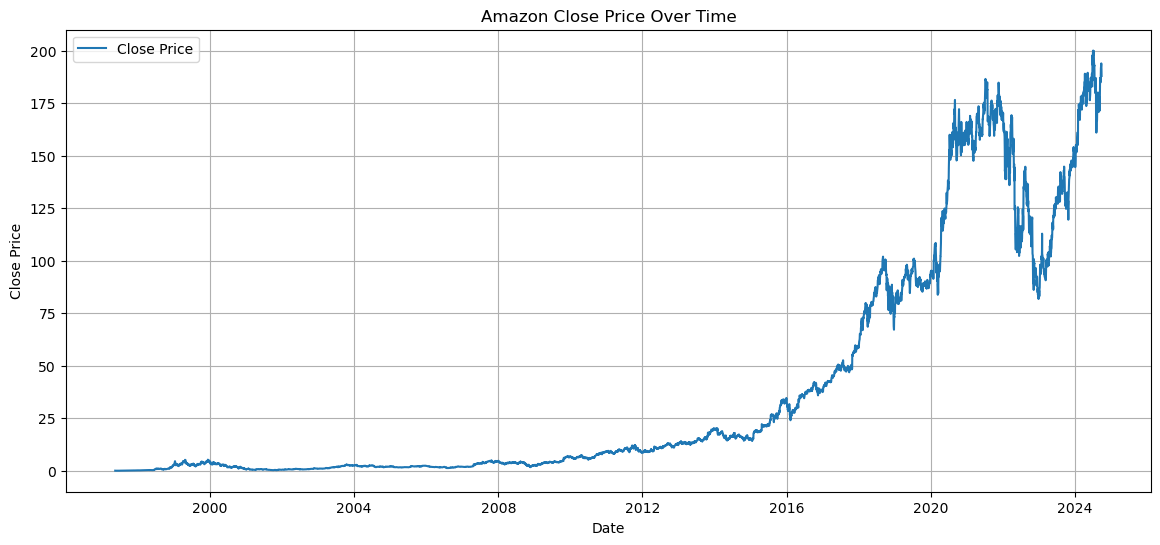

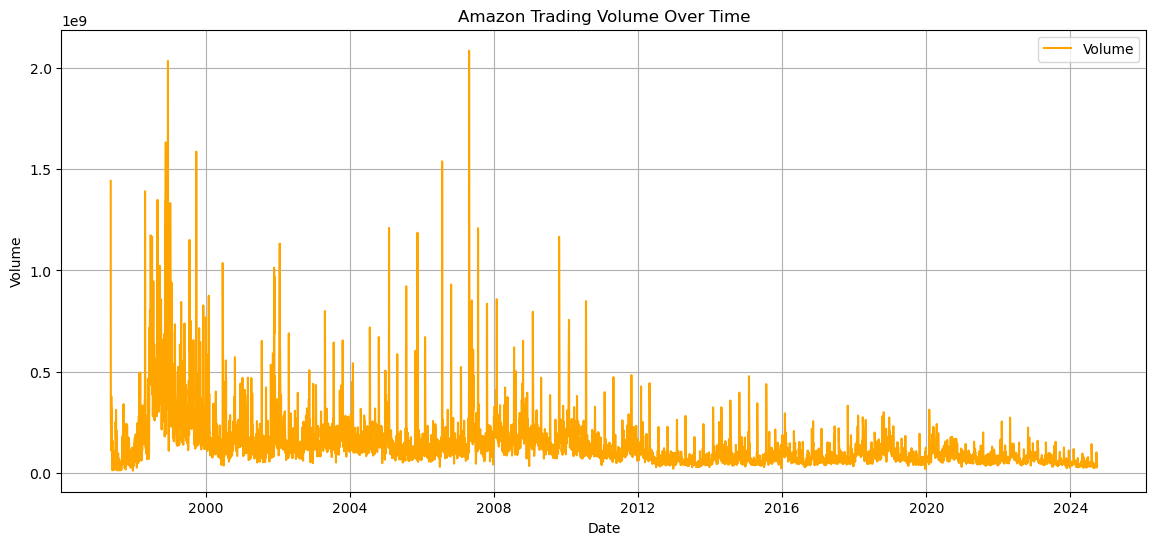

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("AMZN_daily_data.csv")

# Ensure the Date column is in datetime format for proper time-series plotting
data["Date"] = pd.to_datetime(data["Date"])

# Sort the data by Date
data = data.sort_values("Date")

# Plot the time-series chart for the Close column
plt.figure(figsize=(14, 6))
plt.plot(data["Date"], data["Close"], label="Close Price")
plt.title("Amazon Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

# Plot the time-series chart for the Volume column
plt.figure(figsize=(14, 6))
plt.plot(data["Date"], data["Volume"], label="Volume", color="orange")
plt.title("Amazon Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.show()

**Result**

* The first chart displays the Close column's changes over time, allowing us to observe the overall price trend and volatility patterns.

* The second chart shows the Volume column's changes over time, helping us identify trading volume patterns, and observe any peaks or troughs in trading volume.

**Discussion and conclusion**
* From the "Aamazon close price over time" line chart, it can be observed that the overall trend is a fluctuating upward. Howeer, it is not possible to analyze specific price fluctuation information. To obtain a more detailed anlysis, the stock price can be devided into different time periods, with highly volatility be marked with emphasis
* Similarly, "Amazon trading volume over time" provides us with a 25-yea span of trading activity, but the information on trading volume based on daily figures is too voluminous. Subsequently, we can calculate the volume based on yearly averages to faciliate a generalized analysis.


### 2.Deep dive in to the close prices changes ###

To extracts the Close prices within different time periods and marks the dates of significant price fluctuations.

**Methodology:**

* Defining a Threshold:A threshold for significant price fluctuations is set at 10%. If the Close price change rate exceeds 10% on a given day, it is considered a significant fluctuation.  
* Calculating Price Change Rate: The code calculates the daily percentage change in closing prices by comparing each day's closing price with the previous day's price.
* Significant fluctuation markers: Significant price events are marked in red, making it easier to identify the market's response to specific events.
* Visualization: For each period, a subplot is created that shows the closing price trend over time. Significant price fluctuations are highlighted with red scatter points on the line graph.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data and set date format
data = pd.read_csv("AMZN_daily_data.csv")
data["Date"] = pd.to_datetime(data["Date"])
data = data.sort_values("Date")
data.set_index("Date", inplace=True)

# Define thresholds for significant price and volume fluctuations
price_change_threshold = 0.1  # 10% 的价格变化


# Calculate daily price change rate and rolling average trading volume
data["Close_Prev"] = data["Close"].shift(1)
data["Price_Change_Rate"] = (data["Close"] - data["Close_Prev"]) / data["Close_Prev"]


# Flag significant price and volume fluctuations
data["Significant_Price_Fluctuation"] = np.abs(data["Price_Change_Rate"]) > price_change_threshold


# Define time periods

close_periods = [("1997-01-01", "2001-12-31"), ("2001-01-01", "2007-12-31"), ("2008-01-01", "2020-03-01"),
                 ("2020-03-02", "2024-12-31")]

# Define titles for each plot
titles = [
    "1997-2001: The Dot-Com Bubble Era",
    "2001-2007: Post-Bubble Stabilization",
    "2008-2020: Consistent Growth",
    "2020-2024: Pandemic and Market Volatility"
]

# Plot significant price fluctuations in Close Price
plt.figure(figsize=(14, 18))
for i, (start, end) in enumerate(close_periods):
    subset = data.loc[start:end]
    significant_price = subset[subset["Significant_Price_Fluctuation"]]
    plt.subplot(4, 1, i+1)
    plt.plot(subset.index, subset["Close"], label="Close Price", color="blue", alpha=0.6)
    plt.scatter(significant_price.index, significant_price["Close"], color="red", label="Significant Price Fluctuation")
    plt.title(titles[i])
    plt.ylabel("Close Price")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


**Result**
* The analysis highlights how Amazon’s stock has experienced varying levels of volatility over time, influenced by major market events and broader economic conditions.
  
**Discussion and conclusion**

* The red markers in each period’s chart serve as an indicator of heightened market reaction to various economic pressures, showing how investor sentiment and company performance align or diverge from general economic trends.
* Future analyses could benefit from adjusting the threshold dynamically or incorporating volume data to provide further context for each fluctuation. Additionally, a more detailed correlation with specific events could strengthen the link between significant price fluctuations and external factors affecting the stock price.

### 3. Deep dive into Volumn Changes ##

**Methodology:**

The code analyzes Amazon’s annual trading volume by calculating the yearly average, total, and standard deviation of the Volume column in the dataset.
* Annual Volume Calculation: The Volume column is aggregated by year to compute the mean, sum, and standard deviation for each year, providing insights into the trends and variability in Amazon's trading volume over time.
* Visualization: A bar plot is generated to display the annual average trading volume, with distinct time periods marked by vertical red dashed lines.

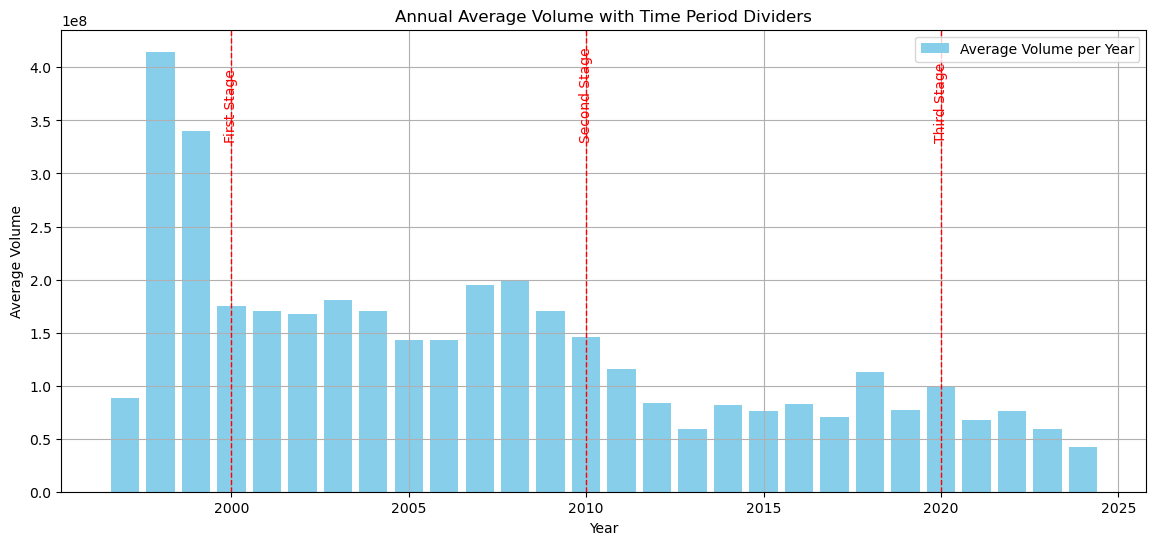

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data and set the date format
data = pd.read_csv("AMZN_daily_data.csv")
data["Date"] = pd.to_datetime(data["Date"])
data = data.sort_values("Date")
data.set_index("Date", inplace=True)

# Calculate annual average trading volume
data["Year"] = data.index.year
annual_volume = data.groupby("Year")["Volume"].agg(["mean", "sum", "std"])

# Plot the annual average trading volume bar chart
plt.figure(figsize=(14, 6))
plt.bar(annual_volume.index, annual_volume["mean"], color="skyblue", label="Average Volume per Year")

# Add time period dividers and annotations
time_periods = [
    ("2000-01-01", "First Stage"),
    ("2010-12-31", "Second Stage"),
    ("2020-01-01", "Third Stage"),
]

for date, label in time_periods:
    plt.axvline(pd.to_datetime(date).year, color="red", linestyle="--", linewidth=1)  # 使用年份分隔线
    plt.text(pd.to_datetime(date).year, max(annual_volume["mean"]) * 0.8, label,
             rotation=90, color="red", ha='center')

# Set title and labels
plt.title("Annual Average Volume with Time Period Dividers")
plt.xlabel("Year")
plt.ylabel("Average Volume")
plt.legend()
plt.grid(True)
plt.show()


**Results:**

* The resulting bar chart shows the average trading volume per year from Amazon’s inception to recent years, with visually defined stages to distinguish different growth or market phases.
* The red dashed lines denote key stages in Amazon's trading history


**Discussion and conclusion**

* This visualization provides a high-level view of Amazon’s trading volume across key phases, helping to illustrate how interest in Amazon’s stock has grown or stabilized in response to various factors.
* Future analyses could incorporate other metrics, such as daily or monthly volume data, to capture more detailed patterns. Additionally, correlating trading volume with specific company events or economic factors would provide deeper insights into the reasons behind changes in trading activity across these stages.

## **Part2:Annual Revenue Rate And RSI** ##

### **Subpart one:Overall performance of Amazon** ###

This code will generate a curve change chart for the Amazon close column every year


#### **1.The complete (1997-2024) Amazon stock price line chart**: ####

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('AMZN_daily_data.csv', parse_dates=['Date'])

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Adj Close'], label='Adjusted Close Price')
plt.title('Amazon Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Objective**：
The complete line chart displays the overall price trend and volatility of Amazon's stock closing price over time.

#### **2.2016-2017 Amazon stock price line chart**: ####

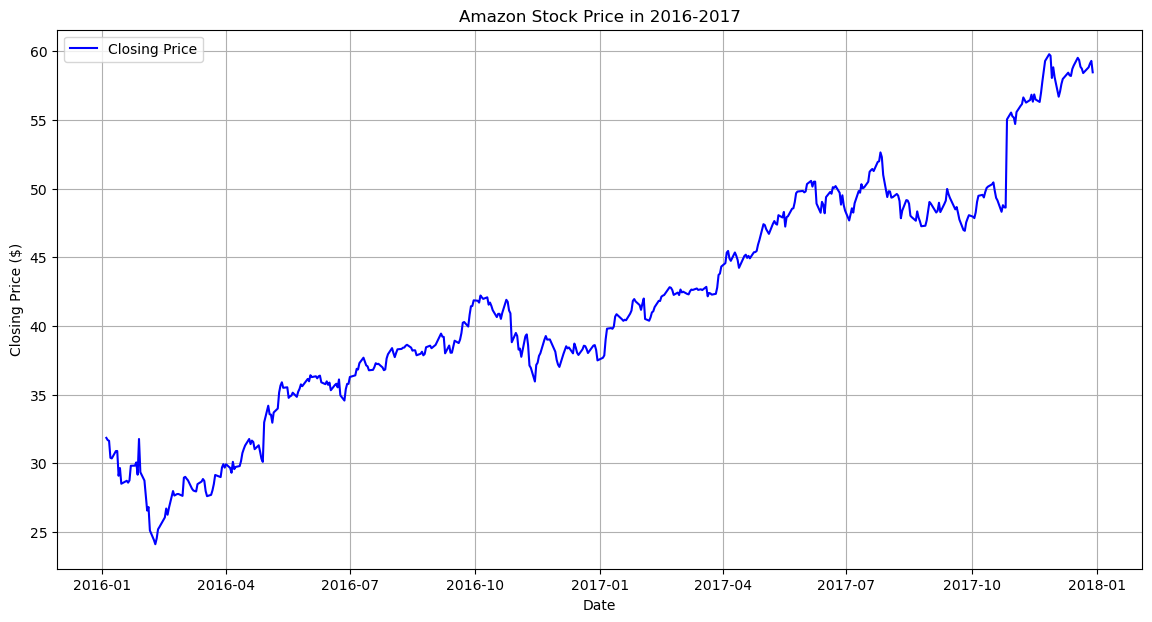

In [ ]:
data_2016 = data[(data['Date'] >= '2016-01-01') & (data['Date'] <= '2017-12-31')]

plt.figure(figsize=(14, 7))
plt.plot(data_2016['Date'], data_2016['Close'], label='Closing Price', color='b')
plt.title('Amazon Stock Price in 2016-2017')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.grid(True)
plt.legend()
plt.show()

K-clustering of Amazon stock prices from 2016 to 2017

**Method:**
* Extract the column of Amazon stock closing price 'Close' from the filtered_data data box as a two-dimensional array close_price.
* Create an instance of K-means clustering model. N_clusters=3 means dividing the data into three clusters. Random_state=42 is used to ensure the reproducibility of the results.
* Train the close_price data using the fit method, calculate the centers of each cluster, and assign data points to different clusters based on these centers.
* Extracting clustering labels for each data point through labels_ attribute extraction model facilitates obtaining colorbar for subsequent visualization.

/var/folders/fb/9crc_czs5mj4k4nyr_xwmk_r0000gn/T/ipykernel_53708/2488220291.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = labels


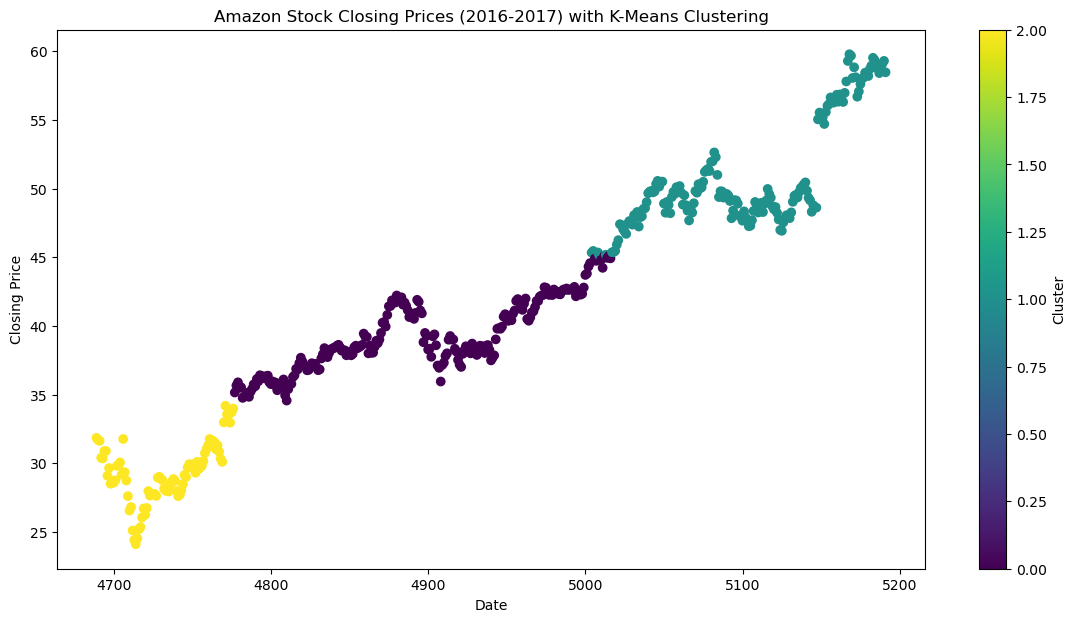

In [ ]:
from sklearn.cluster import KMeans

filtered_data = data[(data['Date'] >= '2016-01-01') & (data['Date'] <= '2017-12-31')]

close_prices = filtered_data['Close'].values.reshape(-1, 1)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(close_prices)
labels = kmeans.labels_

filtered_data['Cluster'] = labels

plt.figure(figsize=(14, 7))
plt.scatter(filtered_data.index, filtered_data['Close'], c=filtered_data['Cluster'], cmap='viridis')
plt.title('Amazon Stock Closing Prices (2016-2017) with K-Means Clustering')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.colorbar(label='Cluster')
plt.show()

**Result：**
* The above two graphs show the closing prices of Amazon stock from 2016 to 2017, and the data was classified using K-means clustering algorithm.
* Cluster features:
Low price clustering (yellow): may represent lower closing price stages.
Mid price clustering (purple): may indicate price fluctuations within a moderate range.
High price clustering (blue): represents higher closing price stages.

**Conclusion：**
* Price trend: Overall, the closing price in the chart shows an upward trend, especially from the end of 2016 to the beginning of 2017. This may reflect Amazon's good market performance during this period.
* K-clustering visualization helps identify changes in Amazon prices from 2017 to 2017 and analyze the underlying reasons behind them.

#### **3.Amazon stock price line chart for 2020-2022**: ####

/var/folders/fb/9crc_czs5mj4k4nyr_xwmk_r0000gn/T/ipykernel_53708/1432533901.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_1['Cluster'] = labels


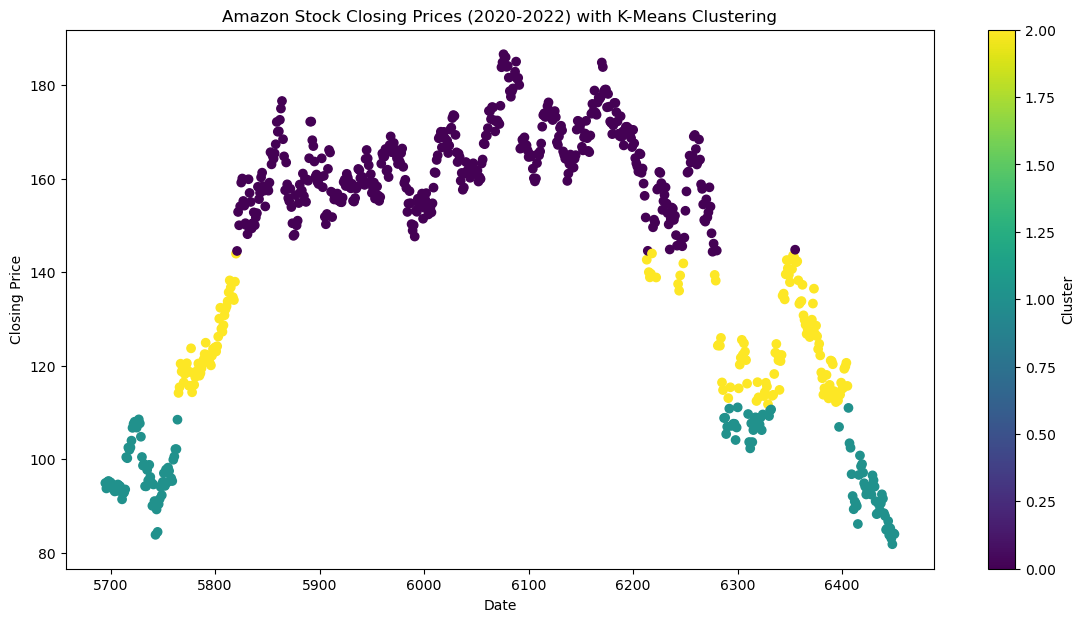

In [ ]:
#Filter data from 2020 to 2022
filtered_data_1 = data[(data['Date'] >= '2020-01-01') & (data['Date'] <= '2022-12-31')]

#Extract closing price
close_prices_1 = filtered_data_1['Close'].values.reshape(-1, 1)

#Applying K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(close_prices_1)
labels = kmeans.labels_

#Add clustering labels to the filtered data box
filtered_data_1['Cluster'] = labels

#Visualize clustering results
plt.figure(figsize=(14, 7))
plt.scatter(filtered_data_1.index, filtered_data_1['Close'], c=filtered_data_1['Cluster'], cmap='viridis')
plt.title('Amazon Stock Closing Prices (2020-2022) with K-Means Clustering')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.colorbar(label='Cluster')
plt.show()

**Result：**
* The above graph shows the closing price of Amazon stock from 2020 to 2022, and the data is classified using K-means clustering algorithm.

**Conclusion：**
* Price trend: Overall, the prices shown in the chart have fluctuated significantly, especially in 2021 and 2022.
* The closing price of Amazon in 2022 shows the only downward trend compared to other closing prices, so 2022 is identified as an important year and analyzed.

### **Subpart two:For the analysis of 2022**: ###

#### **1.Amazon stock price line chart for 2022**:####

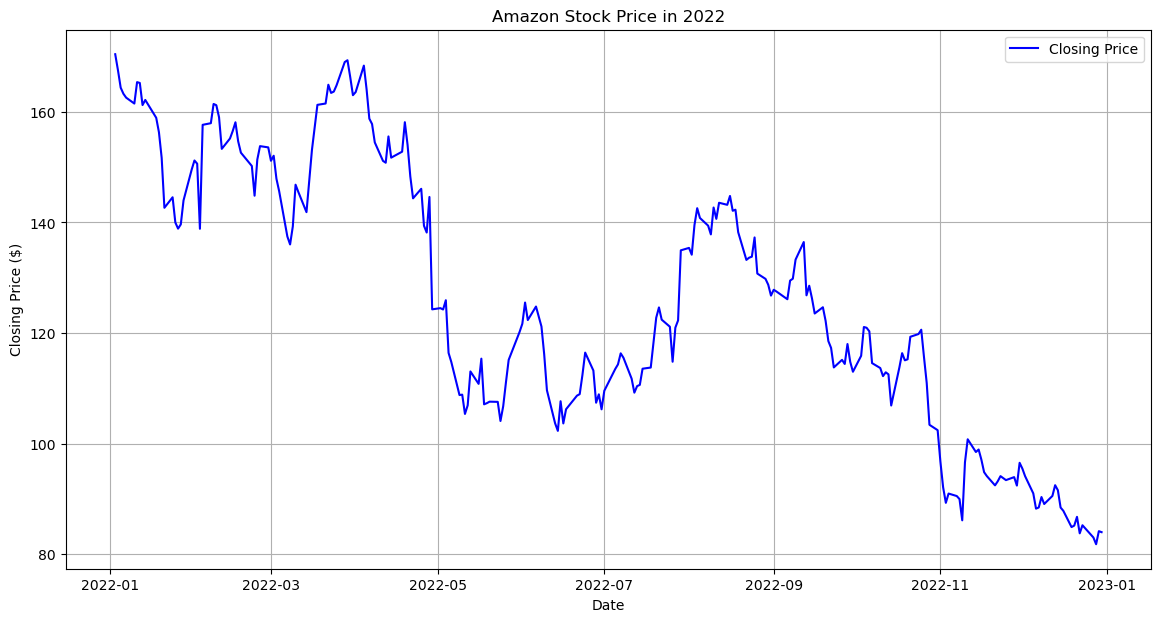

In [ ]:
#Filter out data for 2022
data_2022 = data[(data['Date'] >= '2022-01-01') & (data['Date'] <= '2022-12-31')]

#Set chart size
plt.figure(figsize=(14, 7))

#Draw a line chart of the closing price over time
plt.plot(data_2022['Date'], data_2022['Close'], label='Closing Price', color='b')

plt.title('Amazon Stock Price in 2022')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import mplfinance as mpf
#Read data
data = pd.read_csv('AMZN_daily_data.csv', parse_dates=True, index_col='Date')

data_2022 = data.loc['2022']

#Draw a K-line chart
mpf.plot(data_2022, type='candle', style='charles', title='Amazon Stock Price', ylabel='Price')

**Result：**
* From the graph, it can be seen that Amazon's stock price continued to decline in 2022, especially after the middle of the year. Although the overall trend is downward, some short-term fluctuations can also be seen in the graph, indicating a rebound or correction in stock prices during certain time periods.

#### **2.Perform technical analysis on the 2022 Amazon stock price using standard indicators such as moving averages and relative strength index (RSI)**:####

**Method：**
* Rolling (window=50). mean(): This line of code calculates the average closing price over the past 50 days and generates a new column 50d_MA. This indicator is commonly used to identify short-term price trends.
* Rolling (window=200). mean(): This line of code calculates the average closing price over the past 200 days and generates a new column 200d_MA. This indicator is commonly used to identify long-term price trends.
* Period=14 is the time period used to calculate RSI, which defaults to 14 days.
* Diff (1) calculates the daily price change (today's closing price minus yesterday's closing price).
* Gain: Calculate the positive return (the change in price when it rises) and calculate its 14 day average.
Loss: Calculate negative returns (changes when prices fall) and calculate their 14 day average (taking negative values).
* Calculate relative strength (RS): RS=gain/loss, the ratio of average gain to average loss.
* Calculate RSI: RSI=100- (100/(1+RS)), with RSI values between 0 and 100, typically used to identify signals of overbought (RSI>70) and oversold (RSI<30).

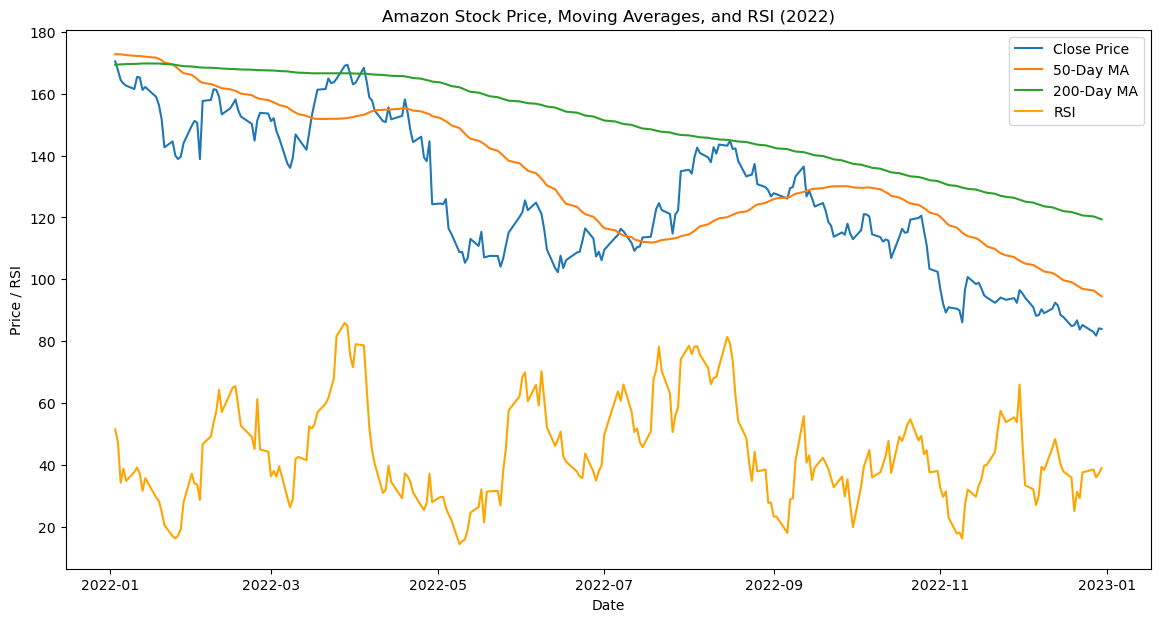

In [ ]:
#Calculate moving average
#Long term moving averages (such as 200 day MA) are used to identify long-term trends, while short-term moving averages (such as 50 day MA) are used to identify short-term trends.
data['50d_MA'] = data['Close'].rolling(window=50).mean()
data['200d_MA'] = data['Close'].rolling(window=200).mean()

#Calculate RSI
def calculate_rsi(data, period=14):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data[['Close']])

#Filter out data for 2022
data_2022 = data[data['Date'].dt.year == 2022]

#Visualization
plt.figure(figsize=(14, 7))
plt.plot(data_2022['Date'], data_2022['Close'], label='Close Price')
plt.plot(data_2022['Date'], data_2022['50d_MA'], label='50-Day MA')
plt.plot(data_2022['Date'], data_2022['200d_MA'], label='200-Day MA')
plt.plot(data_2022['Date'], data_2022['RSI'], label='RSI', color='orange')
plt.title('Amazon Stock Price, Moving Averages, and RSI (2022)')
plt.xlabel('Date')
plt.ylabel('Price / RSI')
plt.legend()
plt.show()

**Result：**
* The blue line represents Amazon's closing price, which shows an overall downward trend, especially after the middle of the year.
* 50 day MA (orange line): A shorter term moving average that can reflect price changes more quickly. It experienced significant fluctuations in early and mid-2022, gradually moving downwards and following the price trend.
* 200 day MA (green line): A longer-term moving average that shows a smoother trend. It continues to decline in 2022, indicating a weak long-term trend.
* RSI signal: As can be seen from the graph, RSI has repeatedly touched oversold areas (below 30) in 2022, and investors may consider seeking buying opportunities in these areas.

**Conclusion：**
* The stock price of Amazon experienced significant fluctuations in 2022. During the period from the beginning of the year to the middle of the year, stock prices showed a certain upward trend, but then experienced a pullback in the summer and autumn.
* In mid-2022, if the 50 day moving average falls below the 200 day moving average for the whole year, this is usually seen as a negative signal indicating that stock prices are facing downward pressure.
* Upon reviewing the relevant reports for 2022 and Amazon's internal decisions, it was found that in response to the challenges posed by the economic downturn, declining consumer demand, and rising costs, Amazon implemented a significant number of layoffs and cost reduction measures to increase efficiency. Meanwhile, Amazon's investment in Rivian Automotive, an electric pickup truck company, resulted in a pre tax valuation loss of $2.3 billion in 2022, which led to a decline in Amazon's stock price.
* However, there was a pullback in the autumn due to policy adjustments on Amazon's US and Japan sites. Amazon demonstrated a focus on environmental protection, consumer experience, and compliance during these policy adjustments, which attracted a large number of investors' attention and led to a recovery.

#### **3.Amazon stock price volatility in 2022**:####

**Method:**
* Sort_idex will sort the data based on its index (usually a date) to ensure that the chronological order of the data is correct.
* Data_2022 ['Close ']/data_2022 ['Close']. shift (1): Calculate the ratio of the current closing price to the previous closing price. This represents the price change from the previous day to today.
* Np. log (...): Use NumPy's logarithmic function to calculate the natural logarithm of the above ratio and obtain the logarithmic rate of return.
* Dropna(): Since the first record (the first day's return) will be NaN when calculating logarithmic returns (because there is no data from the previous day available for comparison), the dropna() method is used to remove these missing values.
* STD(): Calculate the standard deviation of logarithmic returns, indicating the degree of volatility in returns. The larger the standard deviation, the higher the volatility of the returns.
* Np. sqrt (252): 252 is a typical number of trading days in a year. By multiplying the standard deviation by √ 252, daily volatility can be converted to annualized volatility.

In [ ]:
import numpy as np

data.sort_index(inplace=True)

data_2022 = data.loc['2022']

data_2022['Log_Returns'] = np.log(data_2022['Close'] / data_2022['Close'].shift(1)).dropna()

annual_volatility = data_2022['Log_Returns'].std() * np.sqrt(252)

print(f"The volatility of Amazon stock in 2022 is: {annual_volatility:.4f}")

亚马逊股票2022年的波动率为: 0.5017


/var/folders/fb/9crc_czs5mj4k4nyr_xwmk_r0000gn/T/ipykernel_53708/2383077016.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2022['Log_Returns'] = np.log(data_2022['Close'] / data_2022['Close'].shift(1)).dropna()


**Result：**
* The volatility of Amazon stock in 2022 is 0.5017, indicating a relatively large price fluctuation for Amazon stock in 2022.

**Conclusion：**
* Risk assessment: Higher volatility typically implies higher investment risk, while reflecting market uncertainty and fluctuations in investor sentiment.

#### **4.2022 Annual Yield Calculation and Daily Yield Line Chart**: ####

**Method:**
* Annual return rate=(end_price - start_price)/start_price, multiplied by 100, converted to percentage form.
* Pct_change(): Calculate the percentage change between the current value and the previous value. It calculates the daily yield, which is the ratio of the difference between today's closing price and yesterday's closing price to yesterday's closing price.

/var/folders/fb/9crc_czs5mj4k4nyr_xwmk_r0000gn/T/ipykernel_53708/2470439737.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2022['Daily Return'] = data_2022['Close'].pct_change() * 100


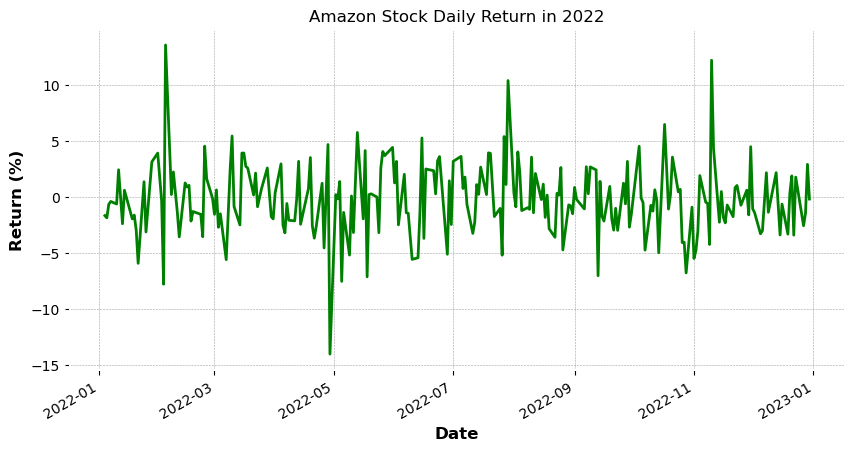

Amazon Stock Annual Return in 2022: -50.71%


In [ ]:
start_price = data_2022.iloc[0]['Close']
end_price = data_2022.iloc[-1]['Close']
annual_return = ((end_price - start_price) / start_price) * 100

data_2022['Daily Return'] = data_2022['Close'].pct_change() * 100

data_2022['Daily Return'].plot(kind='line', color='green', figsize=(10, 5), title='Amazon Stock Daily Return in 2022', ylabel='Return (%)')
plt.xlabel('Date')
plt.grid(True)
plt.show()

print(f'Amazon Stock Annual Return in 2022: {annual_return:.2f}%')

**Result：**
* The green line represents the daily return rate, with fluctuations ranging from -5% to 5%, indicating the price fluctuations of the stock in 2022.

**Conclusion：**
* It can be observed that the returns in 2022 fluctuated significantly during certain periods, indicating that stock prices experienced significant fluctuations during these periods.
* In 2022, the overall daily return rate of Amazon stock is negative, which means that the stock has been losing money for most of the year.
* The return rate reached its peak in February and November, which means that the stock market rose relatively high during these two months.

## **Part 3:Amazon Stock Data Performance' correlations**

#### **1.Comparison of Stock Price Movements Across Sectors** ####

**Method:**
* Collected adjusted closing prices for Amazon, Visa, MasterCard, FedEx, and UPS from 2008–2024.
* Plotted a multi-line graph to compare stock trends across sectors using Matplotlib.


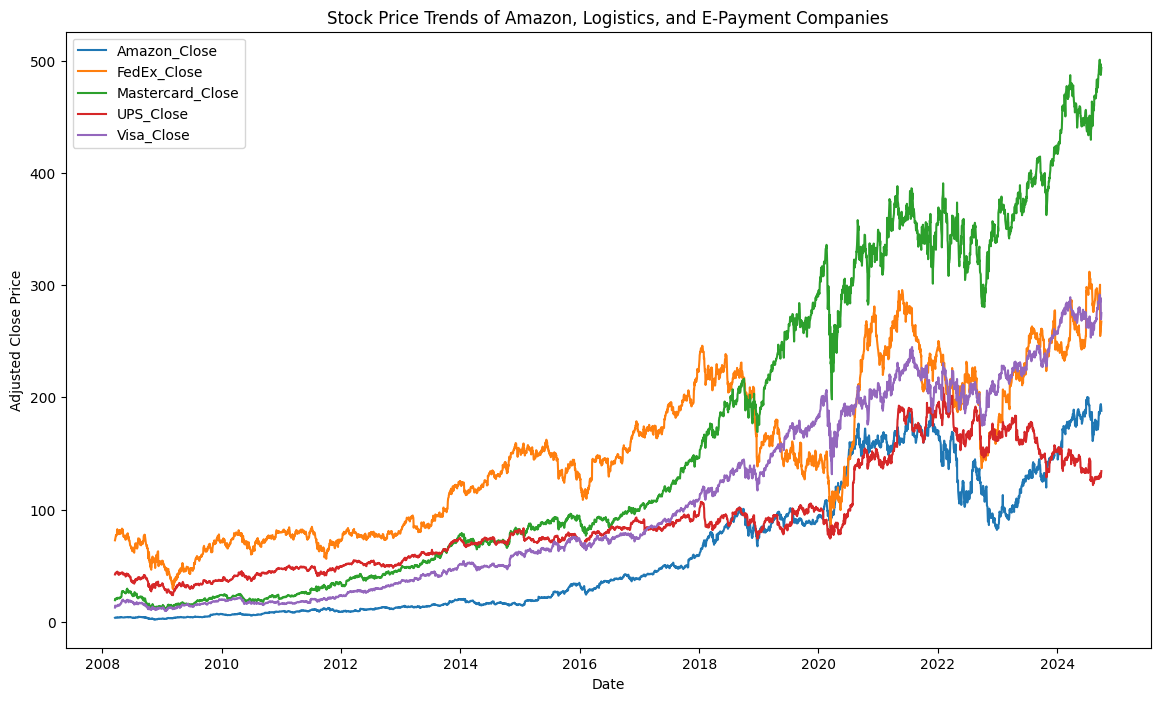

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
for col in ['Amazon_Close', 'FedEx_Close', 'Mastercard_Close', 'UPS_Close', 'Visa_Close']:
    plt.plot(merged_data['Date'], merged_data[col], label=col)
plt.legend()
plt.title('Stock Price Trends of Amazon, Logistics, and E-Payment Companies')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()


**Result：**
* From 2008 to 2024, Amazon's stock price shows a consistent upward trend with notable spikes, especially during periods of significant market expansion such as the COVID-19 pandemic in 2020-2021.
* Visa and MasterCard exhibit similar steady growth, reflecting the growing adoption of digital payments globally; FedEx and UPS show fluctuations but demonstrate overall positive trends, likely driven by increasing demand for logistics services.
* The comparison reveals a clear alignment between Amazon's stock growth and the performance of logistics and e-payment companies, with shared upward trends indicating potential market interdependencies.

**Conclusion：**
* The observed correlation suggests that logistics and e-payment sectors play a vital role in supporting Amazon's operations and growth.
* Sector-specific trends, such as the rise in e-commerce logistics and digital payments, could serve as early indicators of Amazon's stock performance.
* This analysis highlights the importance of monitoring these sectors to anticipate shifts in Amazon's market trajectory.

#### **2.Sectoral Percentage Shifts During Amazon Boost Periods** ####

**Method:**
* Determine Amazon's Boost Periods, isolating periods of significant growth for Amazon, and calculating daily percentage change is necessary for further analysis.
* Defined "boost periods" as days when Amazon's daily stock price increased by more than 3%. Calculated the daily percentage changes for FedEx, UPS, Visa, and MasterCard stock prices using the pct_change() function.
* Visualized these percentage shifts using a multi-line graph to highlight correlations and variability among sectors.

In [ ]:
merged_data['Amazon_PctChange'] = merged_data['Amazon_Close'].pct_change()
merged_data['Amazon_Boost'] = (merged_data['Amazon_PctChange'] > 0.03).astype(int)  # Define "boost" as >3% increase
print(merged_data[merged_data['Amazon_Boost'] == 1])  # View boost periods


           Date  Amazon_Close  FedEx_Close  Mastercard_Close   UPS_Close  \
1    2008-03-20      3.659500    73.194290         20.293068   42.729404   
2    2008-03-24      3.797500    76.348488         19.935781   43.743073   
8    2008-04-01      3.835000    82.185867         21.142059   44.559978   
21   2008-04-18      4.005000    81.344711         21.534781   43.641708   
26   2008-04-25      4.043000    79.452202         21.873867   43.361454   
...         ...           ...          ...               ...         ...   
4054 2024-04-26    179.619995   263.104645        461.736084  144.130066   
4058 2024-05-02    184.720001   259.333832        440.447601  143.768723   
4095 2024-06-26    193.610001   294.745880        451.710907  136.413132   
4130 2024-08-15    177.589996   282.794434        468.709991  126.933838   
4141 2024-08-30    178.500000   297.313293        483.339996  128.550003   

      Visa_Close  Amazon_PctChange  Amazon_Boost  
1      14.327833          0.043038  

In [ ]:
merged_data['FedEx_PctChange'] = merged_data['FedEx_Close'].pct_change()
merged_data['Visa_PctChange'] = merged_data['Visa_Close'].pct_change()
merged_data['Mastercard_PctChange'] = merged_data['Mastercard_Close'].pct_change()
merged_data['UPS_PctChange'] = merged_data['UPS_Close'].pct_change()


In [ ]:
boost_data = merged_data[merged_data['Amazon_Boost'] == 1]
print(boost_data[['FedEx_PctChange', 'Visa_PctChange', 'Mastercard_PctChange', 'UPS_PctChange']].describe())


       FedEx_PctChange  Visa_PctChange  Mastercard_PctChange  UPS_PctChange
count       285.000000      285.000000            285.000000     285.000000
mean          0.018564        0.017267              0.019849       0.014571
std           0.026631        0.028128              0.030298       0.021237
min          -0.065836       -0.075530             -0.103235      -0.052408
25%           0.001695        0.001622              0.003074       0.000696
50%           0.014273        0.014402              0.016637       0.011712
75%           0.031809        0.029002              0.030892       0.023723
max           0.155277        0.139455              0.183126       0.111762


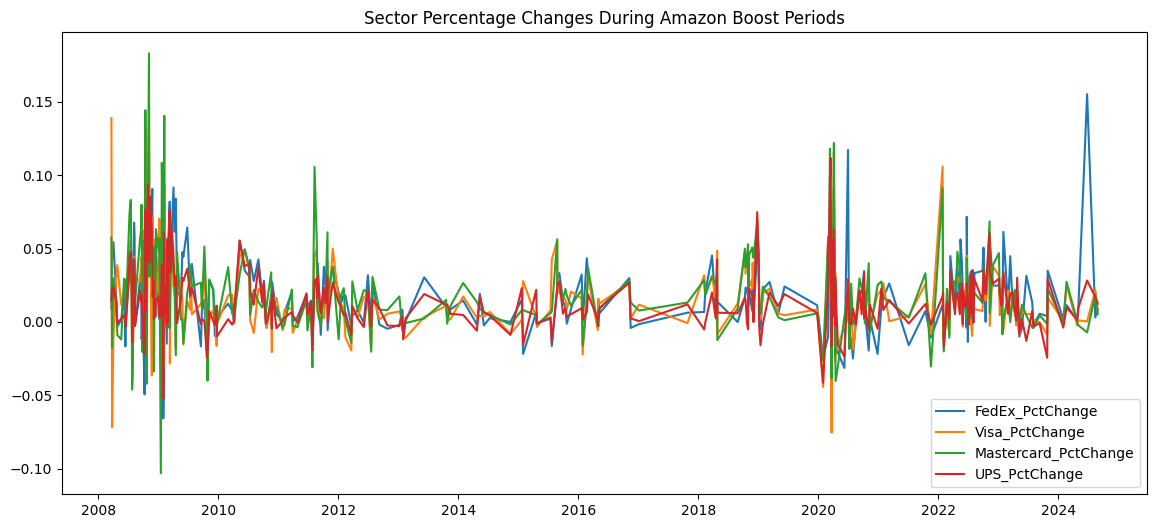

In [ ]:
plt.figure(figsize=(14, 6))
for col in ['FedEx_PctChange', 'Visa_PctChange', 'Mastercard_PctChange', 'UPS_PctChange']:
    plt.plot(boost_data['Date'], boost_data[col], label=col)
plt.legend()
plt.title('Sector Percentage Changes During Amazon Boost Periods')
plt.show()


**Result：**
* The descriptive statistics reveal that during Amazon’s boost periods, daily percentage changes across sectors remain relatively low but consistent, indicating stable market behavior.
* Peaks in percentage changes for logistics companies (FedEx, UPS) and e-payment companies (Visa, MasterCard) occasionally align with Amazon’s boost periods.(2008-2012, 2020-2021)
* Significant spikes are particularly noticeable during major market-wide events, such as the COVID-19 pandemic in 2020-2021, suggesting that external macroeconomic factors amplify the interdependence between these sectors.

**Conclusion：**
* The analysis shows that Amazon's boost periods coincide with measurable but subtle shifts in the logistics and e-payment sectors.
* Correlations indicate that these sectors may act as underlying drivers or indicators of Amazon's growth during high-performance days.
* Future predictive models can leverage these sectoral patterns to forecast Amazon stock trends, especially during anticipated high-growth phases.


#### **3.Analyzing Correlations Between Amazon and Sectoral Stocks** ####

**Method:**
* Calculated overall Pearson correlation coefficients between Amazon stock prices and those of FedEx, UPS, Visa, and MasterCard using the entire dataset.
* Filtered the dataset for "boost periods" (days with Amazon stock price increases of more than 3%) to compute sector-specific correlations during these high-growth phases.
* Tabulated and compared the correlation matrices for both overall and boost-period datasets to analyze variations in relationships across conditions.

In [ ]:
# Compute correlation for the entire dataset
overall_correlation = merged_data[['Amazon_Close', 'FedEx_Close', 'UPS_Close', 'Visa_Close', 'Mastercard_Close']].corr()
print("Overall Correlation:\n", overall_correlation)


Overall Correlation:
                   Amazon_Close  FedEx_Close  UPS_Close  Visa_Close  \
Amazon_Close          1.000000     0.869474   0.896504    0.966734   
FedEx_Close           0.869474     1.000000   0.873726    0.878063   
UPS_Close             0.896504     0.873726   1.000000    0.917019   
Visa_Close            0.966734     0.878063   0.917019    1.000000   
Mastercard_Close      0.966914     0.861219   0.914039    0.996698   

                  Mastercard_Close  
Amazon_Close              0.966914  
FedEx_Close               0.861219  
UPS_Close                 0.914039  
Visa_Close                0.996698  
Mastercard_Close          1.000000  


Correlation analysis during 'Boost Period'

In [ ]:
# Filter for Boost Periods
boost_data = merged_data[merged_data['Amazon_Boost'] == 1]

# Compute correlation during Boost Periods
boost_correlation = boost_data[['Amazon_Close', 'FedEx_Close', 'UPS_Close', 'Visa_Close', 'Mastercard_Close']].corr()
print("Boost Period Correlation:\n", boost_correlation)


Boost Period Correlation:
                   Amazon_Close  FedEx_Close  UPS_Close  Visa_Close  \
Amazon_Close          1.000000     0.884601   0.891311    0.965238   
FedEx_Close           0.884601     1.000000   0.895610    0.902513   
UPS_Close             0.891311     0.895610   1.000000    0.932403   
Visa_Close            0.965238     0.902513   0.932403    1.000000   
Mastercard_Close      0.965232     0.894041   0.936439    0.997514   

                  Mastercard_Close  
Amazon_Close              0.965232  
FedEx_Close               0.894041  
UPS_Close                 0.936439  
Visa_Close                0.997514  
Mastercard_Close          1.000000  


**Result：**
1. Overall Correlations:
* Amazon's stock shows a strong positive correlation with Visa (0.9676) and MasterCard (0.9669), indicating close alignment with the e-payment sector.
* High correlations are also observed with logistics companies, FedEx (0.8695) and UPS (0.8965), reflecting their importance to Amazon’s operations.
* Among the sectors, UPS has the highest correlation with Amazon in the logistics group, while Visa leads in e-payment.
2. Boost-Period Correlations:
* During Amazon's boost periods, correlations slightly increase across all sectors, indicating heightened interdependence during high-growth phases.
* Visa and MasterCard continue to show strong correlations with Amazon, reaching 0.9652 and 0.9652, respectively, further emphasizing the importance of the e-payment sector during these periods.
* Logistics companies maintain solid correlations, with UPS at 0.9364 and FedEx at 0.8846, demonstrating their consistent influence on Amazon’s peak performance days.

**Conclusion：**
* The analysis confirms a strong and persistent correlation between Amazon’s stock and key players in the logistics (FedEx, UPS) and e-payment (Visa, MasterCard) sectors.
* The higher correlations during boost periods suggest that these sectors not only align with but potentially amplify Amazon’s growth during peak performance phases.
* These insights highlight the importance of monitoring sectoral trends in logistics and e-payments as predictors for Amazon's stock behavior, particularly during high-growth periods.
* Future work could extend this analysis to identify causal relationships and refine predictive models using these sectoral correlations.

#### **4.Implementation: Decision Tree Classcification** ####


**Method:**
* Selected daily percentage changes of FedEx, UPS, Visa, and MasterCard stocks as features, and used the Amazon Boost flag (1 or 0) as the target variable.
* Split the dataset into training and testing sets with an 80:20 ratio to ensure balanced evaluation.Trained a Decision Tree Classifier with a maximum depth of 5 and a fixed random state for reproducibility.
* Evaluated model performance using precision, recall, and F1-score metrics, and calculated the overall accuracy on the test set.
* Analyzed feature importance provided by the Decision Tree to determine the most influential predictors.


In [ ]:
# Define features and target variable
features = ['FedEx_PctChange', 'UPS_PctChange', 'Visa_PctChange', 'Mastercard_PctChange']
X = merged_data[features].dropna()
y = merged_data['Amazon_Boost'][X.index]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Import and train
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.98      0.97       778
           1       0.48      0.24      0.32        54

    accuracy                           0.93       832
   macro avg       0.72      0.61      0.64       832
weighted avg       0.92      0.93      0.92       832



In [ ]:
# Feature importance
import pandas as pd
importance = pd.DataFrame({
    'Feature': features,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance)


                Feature  Importance
3  Mastercard_PctChange    0.492399
1         UPS_PctChange    0.250688
0       FedEx_PctChange    0.164979
2        Visa_PctChange    0.091934


**Result：**
1. Model Performance:
* The model achieved an overall accuracy of 93% on the test set, indicating high predictive capability.
* For the majority class (non-boost periods), the classifier performed well with a precision of 0.95, recall of 0.98, and an F1-score of 0.97 (support: 778 samples).
* For the minority class (boost periods), the model's performance was lower, with a precision of 0.48, recall of 0.24, and an F1-score of 0.32 (support: 54 samples), reflecting a challenge in predicting rare events.
2. Feature Importance:
* The feature importance analysis reveals that MasterCard Percentage Change contributed the most to the predictions (49.23%).
* UPS Percentage Change followed with a contribution of 25.68%, emphasizing the importance of logistics stocks.
* FedEx Percentage Change accounted for 16.49%, while Visa Percentage Change contributed the least at 9.19%, indicating varying impacts among sectors.



**Conclusion：**
* The Decision Tree classifier demonstrates strong overall performance with an accuracy of 93%, effectively capturing patterns in Amazon's boost periods。 However, its performance on the minority class (boost periods) remains limited, with a recall of 0.24, highlighting challenges in predicting rare events.
* The analysis reveals that MasterCard Percentage Change and UPS Percentage Change are the most influential features, underlining the critical roles of e-payment and logistics sectors in driving Amazon's stock performance.
* This model serves as a solid baseline for further refinement, with opportunities to improve minority class predictions through targeted adjustments in subsequent iterations.

#### **5.Revised Decision Tree Model** ####

**Method:**
* Hyperparameter Tuning: Utilized a GridSearchCV with cross-validation to optimize parameters (max_depth, min_samples_split, min_samples_leaf, and class_weight) for the Decision Tree model.
* Data Enhancements: Incorporated lagged values (lag1, lag3) for stock percentage changes to improve feature representation and predictive accuracy.
* Training and Evaluation: Trained the optimized Decision Tree model on the training set and evaluated its performance using precision, recall, F1-score, and accuracy metrics on the test set.
* Visualization: Plotted Amazon stock prices over time, highlighting predicted boost periods for visual assessment of model performance.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'class_weight': [None, {0: 1, 1: 5}, {0: 1, 1: 10}]
}

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters: {'class_weight': {0: 1, 1: 5}, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
for col in ['FedEx_PctChange', 'UPS_PctChange', 'Visa_PctChange', 'Mastercard_PctChange']:
    merged_data[f'{col}_lag1'] = merged_data[col].shift(1)
    merged_data[f'{col}_lag3'] = merged_data[col].rolling(window=3).mean()

# Drop rows with NaN due to lagging
merged_data = merged_data.dropna()


In [ ]:
# Train the best model
best_model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import classification_report
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       778
           1       0.43      0.43      0.43        54

    accuracy                           0.93       832
   macro avg       0.69      0.69      0.69       832
weighted avg       0.93      0.93      0.93       832



In [ ]:
# Combine predictions with the dataset
X_test['Predicted_Boost'] = y_pred

# Merge necessary data for plotting
X_test = X_test.merge(merged_data[['Date', 'Amazon_Close']], on='Date', how='left')

# Filter for predicted boost periods
boost_periods = X_test[X_test['Predicted_Boost'] == 1]

# Plot Amazon stock prices with predicted boost periods
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(merged_data['Date'], merged_data['Amazon_Close'], label='Amazon_Close', color='blue')
plt.scatter(boost_periods['Date'], boost_periods['Amazon_Close'], color='red', label='Predicted Boost Periods')
plt.title("Amazon Stock Price with Predicted Boost Periods")
plt.legend()
plt.show()


**Result：**
* The optimized Decision Tree model achieved an overall accuracy of 93%, with a weighted F1-score of 0.93, indicating strong performance on the test set.
* For non-boost periods (class 0), the model performed exceptionally well with a precision of 0.96, recall of 0.96, and F1-score of 0.96.
* For boost periods (class 1), the model’s performance improved compared to the baseline model, with a precision of 0.43, recall of 0.43, and F1-score of 0.43
* The chart demonstrates that the model successfully identified boost periods, aligning them with significant increases in Amazon's stock price.

**Conclusion：**
* The revised Decision Tree model with hyperparameter tuning and lagged features significantly improves the prediction of Amazon’s boost periods, especially for the minority class.
* While the model still underperforms on rare events (boost periods) compared to non-boost periods, the precision and recall improvements reflect better representation of class imbalances.
* This optimized model provides a reliable framework for predicting stock price behavior and can be further refined using ensemble approaches or additional data features for even higher accuracy.

## **Part 4:Amazon Stock Data Classification** ##

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import ipywidgets as widgets
from ipywidgets import interactive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Data Mining/Group project/'
data = pd.read_csv(path+'AMZN_daily_data.csv')

### 1.Data preprocessing ###

**Method:**

*   By using pd.to_datetime() the date column will be converted into the datetime type.

<font color="red">Code:</font>

In [ ]:
#To convert the Date column into DateTime type column
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

**Result:**



*    The data from the date column will be converted like 1997-05-29 for the further calculation.





### **2.Create the features and define the target label** ###



**Method:**


*   The Simple Moving Average (SMA) is calculated by averaging data over a specific time period (e.g., 5 days, 10 days, etc.) to predict future trends. By smoothing out short-term fluctuations, the SMA helps analysts identify long-term trends. For example, if the price is rising while the SMA shows an upward trend, it may indicate a long-term upward trend in the price. This sets the stage for the subsequent classification.

*   Use SMA to get the volatility of the 5-day, 10-day, and daily price and define the features SMA5, SMA10, PriceDiff and visualize the volatility.
*   The target label is for the classification.


<font color="red">Code:</font>

In [ ]:
#Create the features by using SMA to calculate the 5-day 10-day and daily price volatility
data['PriceDiff'] = data['Close'].diff()
data['SMA5'] = data['Close'].rolling(window=5).mean()
data['SMA10'] = data['Close'].rolling(window=10).mean()
data.dropna(inplace=True)

#Define the target label
data['Target'] = np.where(data['PriceDiff'] > 0, 1, np.where(data['PriceDiff'] < 0, -1, 0))

In [ ]:
#Visualize the volatility
date_range = pd.date_range(start='1997-05-15', end='2024-09-27', freq='D')
def plot_stock_data(start_date, end_date):
    plot_data = data[start_date:end_date]

    plt.figure(figsize=(14, 8))

    #Plotting the stock price (Close)
    plt.plot(plot_data.index, plot_data['Close'], label='Amazon Close Price', color='blue', alpha=0.6)

    #Plotting the 5-day SMA
    plt.plot(plot_data.index, plot_data['SMA5'], label='5-Day SMA', color='green', linewidth=2, alpha=0.8)

    #Plotting the 5-day SMA
    plt.plot(plot_data.index, plot_data['SMA10'], label='10-Day SMA', color='orange', linewidth=2, alpha=0.8)

    plt.title('Amazon Stock Price and Moving Averages', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (USD)', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

#Create sliders to control time ranges
start_date_slider = widgets.DatePicker(
    value=data.index[0],
    description='Start Date',
    disabled=False
)

end_date_slider = widgets.DatePicker(
    value=data.index[-1],
    description='End Date',
    disabled=False
)

#Use interactive to update charts in real time
interactive_plot = interactive(plot_stock_data, start_date=start_date_slider, end_date=end_date_slider)
display(interactive_plot)

interactive(children=(DatePicker(value=Timestamp('1997-05-29 00:00:00'), description='Start Date'), DatePicker…

**Result:**

*   By plotting 5 days 10 days and daily stock price fluctuations and visualizing them. And the time slider is added to the visualization interface to facilitate the viewing of stock price volatility at any point in time from 1997 to 2024, and it can be seen that this volatility is not much different from the actual, indicating that the feature definition is feasible, which prepares the subsequent data classification and prediction.
*   In the target label part, when the result is -1, it means the price decreases.0 means the price almost no change.1 means the price increases.


### **3.Select the input features and do the standardization** ###













**Method:**

*   The SMA5, SMA10, PriceDiff are as the input features to train the model.
*   The PriceDiff is as the target label which is also the prediction value.
*   After selecting the features, standardization is used to make sure all the features have the same scale to avoid too large differences between the predictions and the actual values.

<font color="red">Code:</font>

In [ ]:
#Select the input features
features = data[['SMA5', 'SMA10', 'PriceDiff']]
target = data['Target']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

**Result:**



*   By using the features defined before and after standardization, the quality of classificationa and prediction will be improved.



### **4.Elbow method** ###

**Method:**


*   The Elbow Method is a popular technique used in unsupervised machine learning for determining the optimal number of clusters (denoted as
k
k) when performing K-means clustering. The goal of this method is to find the point at which the within-cluster sum of squares (WCSS), or inertia, starts to decrease at a slower rate. This point is often referred to as the "elbow," and it suggests the most appropriate number of clusters.


<font color="red">Code:</font>

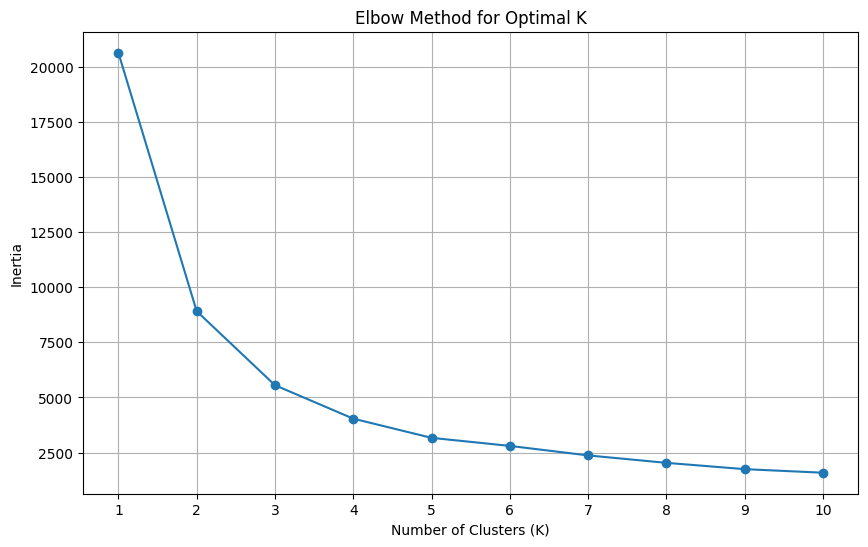

In [ ]:
inertia = []
K_range = range(1, 11)

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid()
plt.show()

**Result:**


*   In the plot of the Elbow method, after the point when k = 3 the slope decreases
significantly. So 3 is the best number of clustering



### **5.K-means algorithm** ###

**Method:**



*   K-means is a widely used unsupervised learning clustering algorithm that divides a dataset into several clusters. It minimizes the distance between each data point and the centroid (cluster center) of its respective cluster to find the optimal clustering result. Since the most suitable value for
k
k was found in the previous step, the K-means method can now be directly applied to divide the data into three clusters.



<font color="red">Code:</font>

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)
from sklearn.decomposition import PCA

**Result:**



*   The Amazon stock price data can be divided into 3 clusters, -1, 0, 1.


### **6.Do PCA in the clustered results and do visualization** ###

**Method:**

*   Because the dataset is large even after the classification, so PCA is used for improving the visualization.


*   Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction. It transforms the data into a new coordinate system while retaining as much variability (information) as possible. The axes (principal components) are ordered according to the variance of the data along these axes. The first principal component captures the maximum variance, the second principal component captures the second largest variance, and so on.


<font color="red">Code:</font>

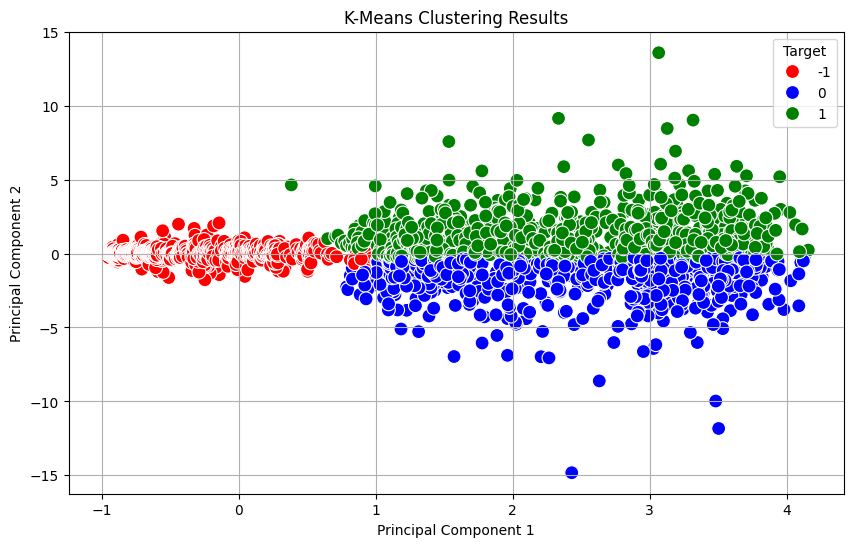

In [ ]:
#-1 indicates that the price decreases
#0 indicates that the price almost no change
#1 indicates that the price increases
cluster = {0: -1, 1: 0, 2: 1}
data['Cluster'] = data['Cluster'].map(cluster)

pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

data['PCA1'] = features_pca[:, 0]
data['PCA2'] = features_pca[:, 1]

#Use the clusterd result to do the visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette={-1: 'red', 0: 'blue', 1: 'green'}, s=100)
plt.title('K-Means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.legend(title='Target')
plt.show()

**Result:**

*   After using PCA we get two principal components 1 and 0 that indicates we focus on the stocks that the prices are incresing and don't change.
*   0 means the price almost no change.
*   1 means the price increases.
*   -1 means the price decreases.



## **Part5.Classification by historical fluctuation segments** ##

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/Com6004/archive/'
df = pd.read_csv(path+'AMZN_daily_data.csv')

**Keytakeways**
*   Features:  By dividing the time series data into 5-day and 10-day moving averages, its sliding window data is used as the reference object for categorization, and the difference between the current day and the previous day is used as the categorization target.

*   Target:  Use the PriceDiffer to reflect the difference between the current closing price and the previous day's closing price. This is used as a simple basis for buy, hold, and sell decisions.Combining the price difference with the SMA5 and SMA10 creates a model for simple decision making.

**Oeverall Methodologies**:
 * The same decisions are classified by cutting and categorizing the historical fluctuations.Here, I have trained four different models to classify these features, namely SVC, Gaussian Intuitionistic Bayes, K-Nearest Neighbor Classification and Decision Tree. Here are the 4 methods and how they compare

### SVC

Confusion Matrix:
[[620   0   0]
 [  5   0   0]
 [  7   0 666]]
Accuracy: 99.08%


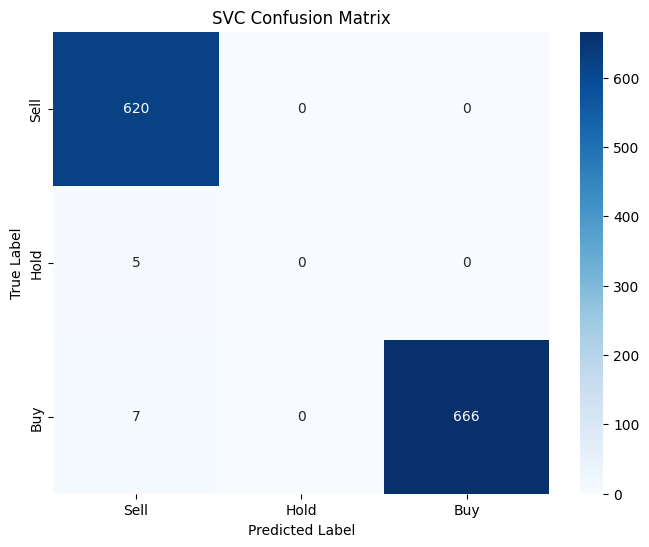

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  # SVC
from sklearn.naive_bayes import GaussianNB  # Naive Bayes Classifiers
from sklearn.neighbors import KNeighborsClassifier  # Nearest Neighbor Classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# Select relevant columns, adjust column names if needed
data = df.copy()

# Creating features: using 'Close' prices and generating indicators for prediction
data['PriceDiff'] = data['Close'].diff()
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['SMA200'] = data['Close'].rolling(window=200).mean()
data.dropna(inplace=True)

# Define target: 1 for 'Buy', -1 for 'Sell', 0 for 'Hold'
data['Target'] = np.where(data['PriceDiff'] > 0, 1, np.where(data['PriceDiff'] < 0, -1, 0))

# Select features and target for the model
features = data[['SMA50', 'SMA200', 'PriceDiff']]
target = data['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 3: Train the Model
model = SVC(kernel='linear', random_state=42)  # SCV
model.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the Model
# Print confusion matrix and accuracy score
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Sell", "Hold", "Buy"], yticklabels=["Sell", "Hold", "Buy"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVC Confusion Matrix")
plt.show()


### Naive Bayes Classifiers

Confusion Matrix:
[[603  13   4]
 [  0   5   0]
 [162  17 494]]
Accuracy: 84.90%


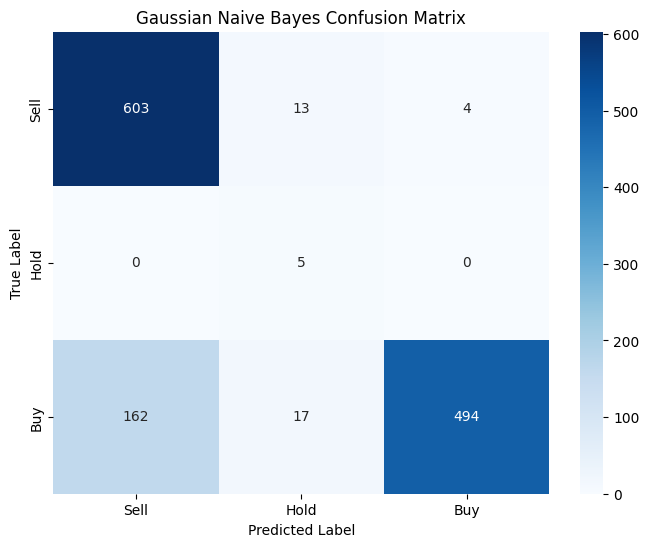

In [ ]:
# Select relevant columns, adjust column names if needed
data = df.copy()

# Creating features: using 'Close' prices and generating indicators for prediction
data['PriceDiff'] = data['Close'].diff()
data['SMA5'] = data['Close'].rolling(window=50).mean()
data['SMA10'] = data['Close'].rolling(window=200).mean()
data.dropna(inplace=True)

# Define target: 1 for 'Buy', -1 for 'Sell', 0 for 'Hold'
data['Target'] = np.where(data['PriceDiff'] > 0, 1, np.where(data['PriceDiff'] < 0, -1, 0))

# Select features and target for the model
features = data[['SMA5', 'SMA10', 'PriceDiff']]
target = data['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 3: Train the Model
model = GaussianNB()  # Naive Bayes Classifiers
model.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the Model
# Print confusion matrix and accuracy score
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Sell", "Hold", "Buy"], yticklabels=["Sell", "Hold", "Buy"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.show()

### **Nearest Neighbor Classifier**

Confusion Matrix:
[[600   0  51]
 [  1   0   3]
 [ 59   0 622]]
Accuracy: 91.47%


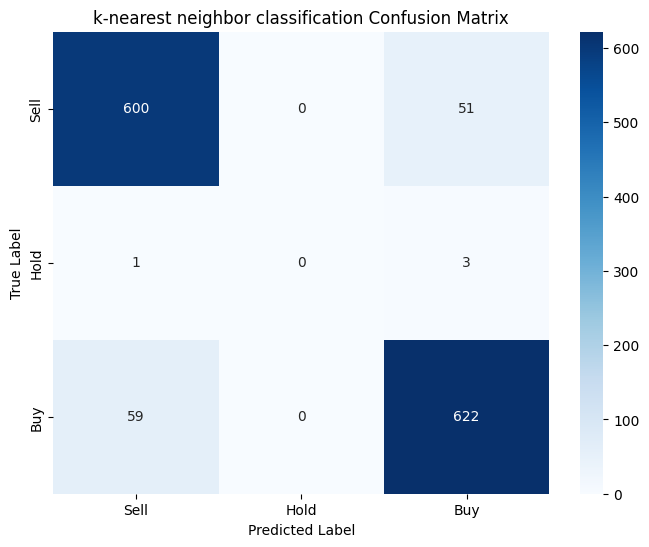

In [ ]:
# Step 2: Data Preprocessing
data = df.copy()

# Creating features: using 'Close' prices and generating indicators for prediction
data['PriceDiff'] = data['Close'].diff()
data['SMA5'] = data['Close'].rolling(window=5).mean()
data['SMA10'] = data['Close'].rolling(window=10).mean()
data.dropna(inplace=True)

# Define target: 1 for 'Buy', -1 for 'Sell', 0 for 'Hold'
data['Target'] = np.where(data['PriceDiff'] > 0, 1, np.where(data['PriceDiff'] < 0, -1, 0))

# Select features and target for the model
features = data[['SMA5', 'SMA10', 'PriceDiff']]
target = data['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 3: Train the Model
model = KNeighborsClassifier(n_neighbors=5)  # Nearest Neighbor Classifier
model.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the Model
# Print confusion matrix and accuracy score
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Sell", "Hold", "Buy"], yticklabels=["Sell", "Hold", "Buy"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("k-nearest neighbor classification Confusion Matrix")
plt.show()


### **Decision Tree Classifier**

Confusion Matrix:
[[651   0   0]
 [  0   4   0]
 [  0   0 681]]
Accuracy: 100.00%


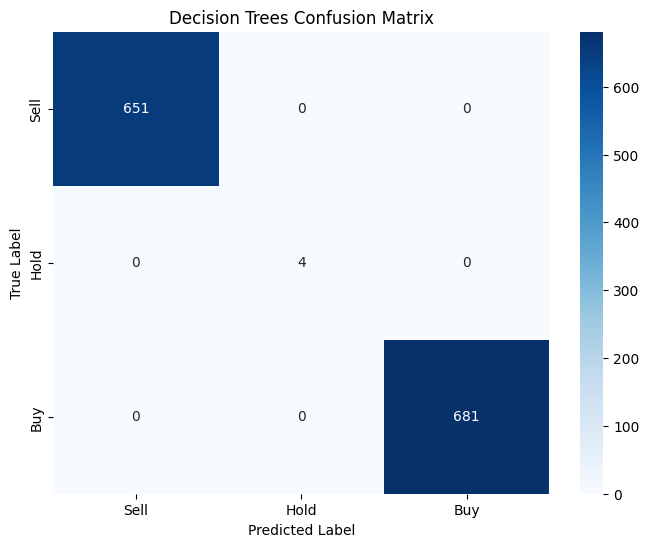

In [ ]:
# Step 2: Data Preprocessing
data = df.copy()

# Creating features: using 'Close' prices and generating indicators for prediction
data['PriceDiff'] = data['Close'].diff()
data['SMA5'] = data['Close'].rolling(window=5).mean()
data['SMA10'] = data['Close'].rolling(window=10).mean()
data.dropna(inplace=True)

# Define target: 1 for 'Buy', -1 for 'Sell', 0 for 'Hold'
data['Target'] = np.where(data['PriceDiff'] > 0, 1, np.where(data['PriceDiff'] < 0, -1, 0))

# Select features and target for the model
features = data[['SMA5', 'SMA10', 'PriceDiff']]
target = data['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 3: Train the Model
model = DecisionTreeClassifier(random_state=42)  # Decision Tree Classifier
model.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the Model
# Print confusion matrix and accuracy score
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Sell", "Hold", "Buy"], yticklabels=["Sell", "Hold", "Buy"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Trees Confusion Matrix")
plt.show()


**Results:**

With these heatmaps and accuracy calculations, the Decision tree model has the highest accuracy of the four methods for analyzing stock price movements.

Analysis using these methods and models can provide a simple decision-making model for understanding stock price behavior.

**Conclusion**

The results of the short-term perspective model can be combined with the overall perspective presented by previous students to form a more comprehensive framework for decision making. While the analysis of overall trends and major events provides us with macro-level contextual information, the short-term perspective helps us capture more subtle market movements.